In [34]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
os.chdir('C:/Users/andre/Dropbox/Penn MCIT/CIT 550 Database/Project')

# Spotify API

In [3]:
df_spotify1 = pd.read_csv('./Data/data.csv.zip')
df_spotify2 = pd.read_csv('./Data/tracks_features.csv.zip')

print(df_spotify1.shape)
print(df_spotify2.shape)

(174389, 19)
(1204025, 24)


In [4]:
df_spotify1.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [5]:
df_spotify2.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [6]:
merg = df_spotify2.merge(df_spotify1[['id', 'popularity']], how = 'inner')

merg.shape

(21183, 25)

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


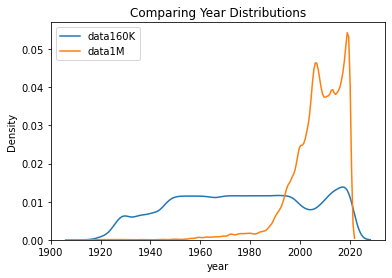

In [7]:
sns.distplot(df_spotify1['year'], hist = False, label = 'data160K')
sns.distplot(df_spotify2[df_spotify2['year'] > 1900]['year'], hist = False, label = 'data1M')

plt.title('Comparing Year Distributions')
plt.legend()

plt.show()

# Album ratings

In [8]:
album = pd.read_csv('./Data/album_ratings.csv.zip')
album.shape

(32358, 16)

In [9]:
album.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [10]:
round(album.describe(), 2)

,Release Year,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
count,32358.00,13884.00,13884.00,9099.00,10574.00,32358.00,32358.00,32358.00,32358.00
mean,2006.67,73.29,12.48,7.78,63.16,72.81,5.65,71.28,61.99
std,14.13,8.40,7.91,0.98,325.20,11.21,6.18,9.65,184.22
min,1940.00,15.00,4.00,1.40,3.00,4.00,1.00,0.00,1.00
25%,2002.00,69.00,6.00,7.40,8.00,67.00,2.00,67.00,7.00
50%,2012.00,74.00,10.00,8.00,14.00,74.00,3.00,73.00,14.00
75%,2017.00,79.00,17.00,8.50,37.00,80.00,7.00,78.00,39.00
max,2020.00,98.00,51.00,9.50,14720.00,100.00,48.00,100.00,4530.00


# Pitchfork database

In [11]:
con = sqlite3.connect("./Data/database.sqlite")

In [12]:
tables = [
          'artists', 
          'content',
          'genres',
          'labels',
          'reviews',
          'years'
]

for tbl in tables:
  print(f'---{tbl}---')
  print(pd.read_sql_query(f"SELECT * FROM {tbl}", con).head(2))
  print('===================================')

---artists---
   reviewid          artist
0     22703  massive attack
1     22721        krallice
---content---
   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
---genres---
   reviewid       genre
0     22703  electronic
1     22721       metal
---labels---
   reviewid      label
0     22703     virgin
1     22721  hathenter
---reviews---
   reviewid         title          artist  \
0     22703     mezzanine  massive attack   
1     22721  prelapsarian        krallice   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   

        author  author_type    pub_date  pub_weekday  pub_day  pub_month  \
0  nate patrin  contributor  2017-01-08            6        8       

In [13]:
# Need to pull STD via pandas. not sure why SQL won't do STDEV
pd.read_sql_query('select * from years', con)['year'].std()

6.659582594929823

In [14]:
query_str = \
"""
SELECT *
FROM reviews
LIMIT 2
"""

pd.read_sql_query(query_str, con)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017


In [46]:
# Make a pandas df with just the columns we need
query_str = \
"""
SELECT 
    t1.reviewid
    , t1.title as album_name
    , t1.artist
    , t1.url as pf_url
    , t1.score as pf_score
    , t1.author as pf_author
    , t1.pub_date as pf_pubdate
    , t2.content as pf_review
FROM reviews t1 
    JOIN content t2 ON t1.reviewid = t2.reviewid
"""

pf = pd.read_sql_query(query_str, con)
pf.shape

(18401, 8)

In [44]:
pf.head()

,reviewid,album_name,artist,pf_url,pf_score,pf_author,pf_pubdate,pf_review
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,nate patrin,2017-01-08,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,zoe camp,2017-01-07,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,david glickman,2017-01-07,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,jenn pelly,2017-01-06,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,kevin lozano,2017-01-06,It is impossible to consider a given release b...


# Create master table

In [53]:
# Merge Spotify with album ratings
df = df_spotify2.merge(album, left_on = 'album', right_on = 'Title', how = 'outer')

# Merge Pitchfork reviews
df = df.merge(pf, left_on = 'album', right_on = 'album_name', how = 'outer')

In [49]:
df.shape

(1333453, 48)

In [54]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,reviewid,album_name,artist,pf_url,pf_score,pf_author,pf_pubdate,pf_review
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.0,1.0,False,0.470,0.978,7.0,-5.399,1.0,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133.0,4.0,1999.0,1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2.0,1.0,True,0.599,0.957,11.0,-5.764,1.0,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200.0,4.0,1999.0,1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3.0,1.0,False,0.315,0.970,7.0,-5.424,1.0,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893.0,4.0,1999.0,1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4.0,1.0,True,0.440,0.967,11.0,-5.830,0.0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640.0,4.0,1999.0,1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5.0,1.0,False,0.426,0.929,2.0,-6.729,1.0,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600.0,4.0,1999.0,1999-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
len(df['album'].unique())

106163

In [57]:
len(df_spotify2['album'].unique())

106162

In [58]:
len(album['Title'].unique())

30232

In [59]:
len(pf['album_name'].unique())

17835

In [64]:
spotify_albums = set(df_spotify2['album'])
album_albums = set(album['Title'])
pf_albums = set(pf['album_name'])

print('Spotify-Album Ratings', len(spotify_albums.intersection(album_albums)))
print('Spotify-PF Ratings', len(spotify_albums.intersection(pf_albums)))
print('PF Rating-Album Ratings', len(pf_albums.intersection(album_albums)))

Spotify-Album Ratings 7187
Spotify-PF Ratings 94
PF Rating-Album Ratings 78
